Name : Patel Disha Bharatbhai

Enrollment no : 18012011063

Batch : DL1

#Import Libarary


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#Data reading

In [2]:
df = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160492 entries, 0 to 160491
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          160492 non-null  int64  
 1   Open               2148 non-null    float64
 2   High               2148 non-null    float64
 3   Low                2148 non-null    float64
 4   Close              2148 non-null    float64
 5   Volume_(BTC)       2148 non-null    float64
 6   Volume_(Currency)  2148 non-null    float64
 7   Weighted_Price     2148 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 9.8 MB


In [4]:
df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [5]:
df.isnull().sum()

Timestamp                 0
Open                 158344
High                 158344
Low                  158344
Close                158344
Volume_(BTC)         158344
Volume_(Currency)    158344
Weighted_Price       158344
dtype: int64

In [8]:
df = df.dropna()
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [9]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
real_price = group['Weighted_Price'].mean()

In [10]:
real_price

date
2011-12-31    4.471603
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.208159
                ...   
2012-04-16    4.960476
2012-04-17    4.986875
2012-04-18    5.094582
2012-04-19    5.127227
2012-04-20    5.136000
Name: Weighted_Price, Length: 112, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 0 to 160423
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          2148 non-null   int64  
 1   Open               2148 non-null   float64
 2   High               2148 non-null   float64
 3   Low                2148 non-null   float64
 4   Close              2148 non-null   float64
 5   Volume_(BTC)       2148 non-null   float64
 6   Volume_(Currency)  2148 non-null   float64
 7   Weighted_Price     2148 non-null   float64
 8   date               2148 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 167.8+ KB


In [12]:
df.corr()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,1.000000,-0.719567,-0.719916,-0.718691,-0.719162,0.250764,0.230437,-0.719018
Open,-0.719567,1.000000,0.999770,0.999632,0.999467,-0.189363,-0.158519,0.999795
High,-0.719916,0.999770,1.000000,0.999312,0.999705,-0.188256,-0.157323,0.999828
Low,-0.718691,0.999632,0.999312,1.000000,0.999596,-0.190523,-0.159639,0.999692
Close,-0.719162,0.999467,0.999705,0.999596,1.000000,-0.189190,-0.158156,0.999836
Volume_(BTC),0.250764,-0.189363,-0.188256,-0.190523,-0.189190,1.000000,0.997416,-0.189626
Volume_(Currency),0.230437,-0.158519,-0.157323,-0.159639,-0.158156,0.997416,1.000000,-0.158672
Weighted_Price,-0.719018,0.999795,0.999828,0.999692,0.999836,-0.189626,-0.158672,1.000000


In [13]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.148000e+03,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,1.330508e+09,5.358110,5.359916,5.355261,5.357402,11.645341,59.414027,5.357481
std,2.752778e+06,0.714615,0.715603,0.714076,0.715377,21.947642,110.314553,0.715321
min,1.325318e+09,3.800000,3.800000,3.800000,3.800000,0.002096,0.010000,3.800000
25%,1.328189e+09,4.880000,4.890000,4.880000,4.880000,1.500510,9.528090,4.880000
50%,1.330529e+09,5.030000,5.030000,5.030000,5.030000,3.916659,19.750304,5.030000
75%,1.332937e+09,5.880000,5.880000,5.880000,5.880000,12.398475,64.672500,5.880000
max,1.334943e+09,7.380000,7.380000,7.380000,7.380000,247.560124,1319.495460,7.380000


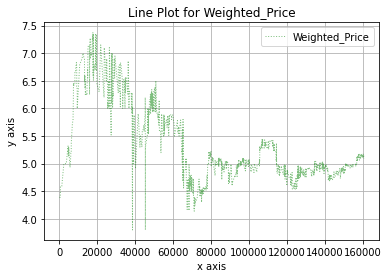

In [14]:
# Line Plot

df.Weighted_Price.plot(kind = "line", color = "g", label = "Weighted_Price",linewidth=1,alpha=0.5,grid=True,linestyle=':')

plt.legend(loc="upper right")   
plt.xlabel("x axis")            
plt.ylabel("y axis")           
plt.title("Line Plot for Weighted_Price") 

plt.show()

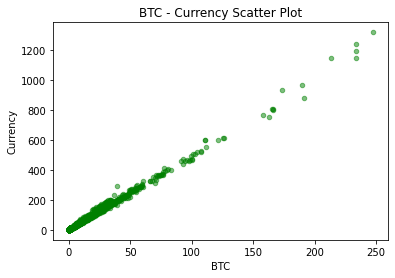

In [15]:
# Scatter Plot 
# x = Volume_(BTC), y = Volume_(Currency)
df.plot(kind='scatter', x='Volume_(BTC)', y='Volume_(Currency)',alpha = 0.5,color = 'green')
plt.xlabel('BTC')              
plt.ylabel('Currency')
plt.title('BTC - Currency Scatter Plot')
plt.show()

In [18]:
# split data
prediction_days = 30
df_train=real_price[:len(real_price)-prediction_days]
df_test=real_price[len(real_price)-prediction_days:]

# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [19]:
### Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [20]:
# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
# epoch= 250


Epoch 1/100
3/3 [==============================] - 3s 7ms/step - loss: 0.5522
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1058
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0373
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0637
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0705
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0594
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0450
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.0351
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0255
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0341
Epoch 12/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0442
Epoch 13/100
3/3 [==============================] - 0s 6ms/s

#Making the predicitions 

In [22]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_btc_price = regressor.predict(inputs)
predicted_btc_price = sc.inverse_transform(predicted_btc_price)

#Visualisierung the Results

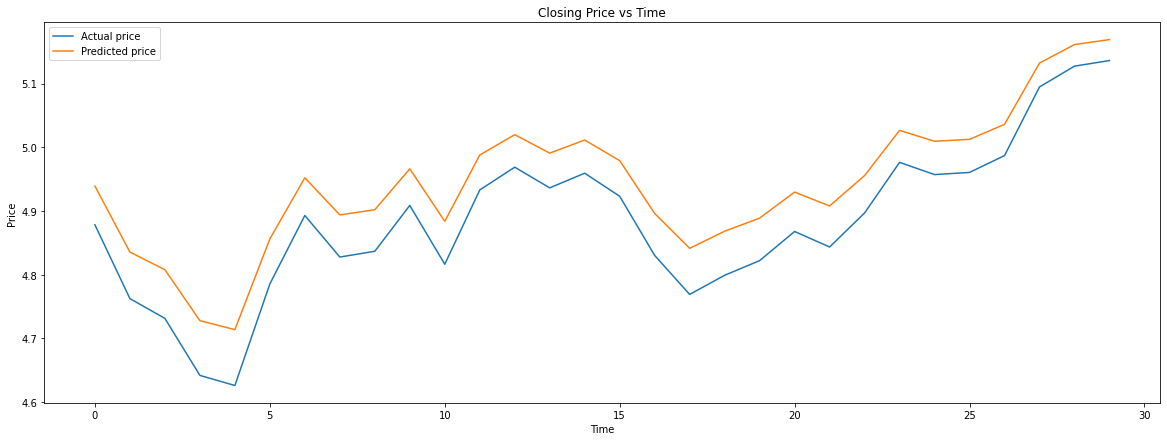

In [23]:
plt.figure(figsize = (20,7))
plt.plot(test_set)
plt.plot(predicted_btc_price)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Closing Price vs Time')
plt.legend(['Actual price', 'Predicted price'])
plt.show()